In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Customer Churn Analysis.csv")

# EDA

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.shape

(7043, 21)

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
data.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [10]:
missing = data[data['TotalCharges']==' '].index.to_list()
missing

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [11]:
data.head(489)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,5949-XIKAE,Female,0,Yes,Yes,8,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05,Yes
485,7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
486,9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No


In [12]:
for i in missing:
    data.loc[i, 'TotalCharges'] = np.nan

In [13]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
Sen_Citi_dict ={0:'No', 1: 'Yes'}
data['SeniorCitizen'] = data['SeniorCitizen'].map(Sen_Citi_dict)

In [15]:
#dropping 'customerID'
data.drop(columns = ['customerID'], inplace=True)
num_cols = ['tenure','MonthlyCharges','TotalCharges']

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [16]:
data[data == 0].count()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [17]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#Missing entries in TotalCharges are 11. these will be replaced using mean methods.
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [19]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
data.duplicated().sum()

22

In [21]:
data.drop_duplicates(keep='last',inplace= True)

In [22]:
data1 =data.copy()

In [23]:
data1.reset_index(drop=True, inplace=True)
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7017,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7018,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7019,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [24]:
data1_num = data1[num_cols]
data1_cat = data1[cat_cols]

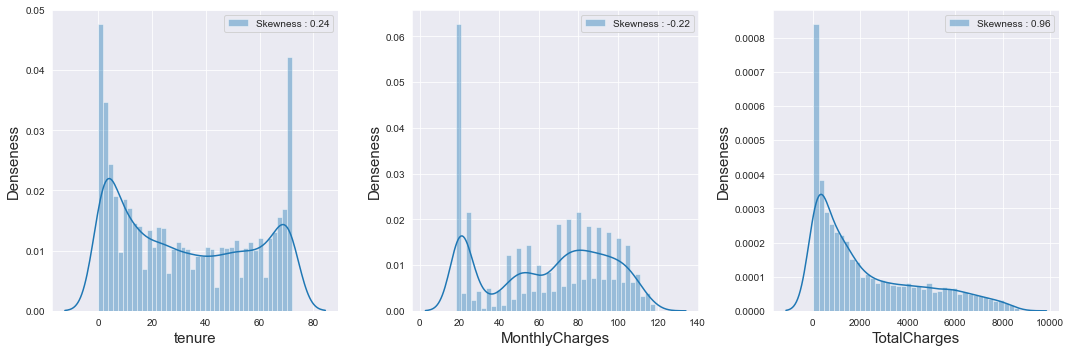

In [25]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(15,5))
for column in data1_num.columns:
    plt.subplot(1,3,i+1)
    sns.distplot(data1_num[column], bins=40, label="Skewness : %.2f"%(data1_num[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Denseness',fontsize=15)
    i+=1
    
plt.tight_layout()

Observation:
Outliers presnts in tenure column.
MonthlyCharges is normally distributed if lower values neglected.
Total Charges is right skewed due to presence of 0 entries

In [26]:
for column in data1_cat:
    print(' ')
    print(column)
    x = data1_cat[column].value_counts()
    print(x)

 
gender
Male      3541
Female    3480
Name: gender, dtype: int64
 
SeniorCitizen
No     5880
Yes    1141
Name: SeniorCitizen, dtype: int64
 
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
 
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
 
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
 
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
 
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
 
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
 
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
 
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
 
TechSuppo

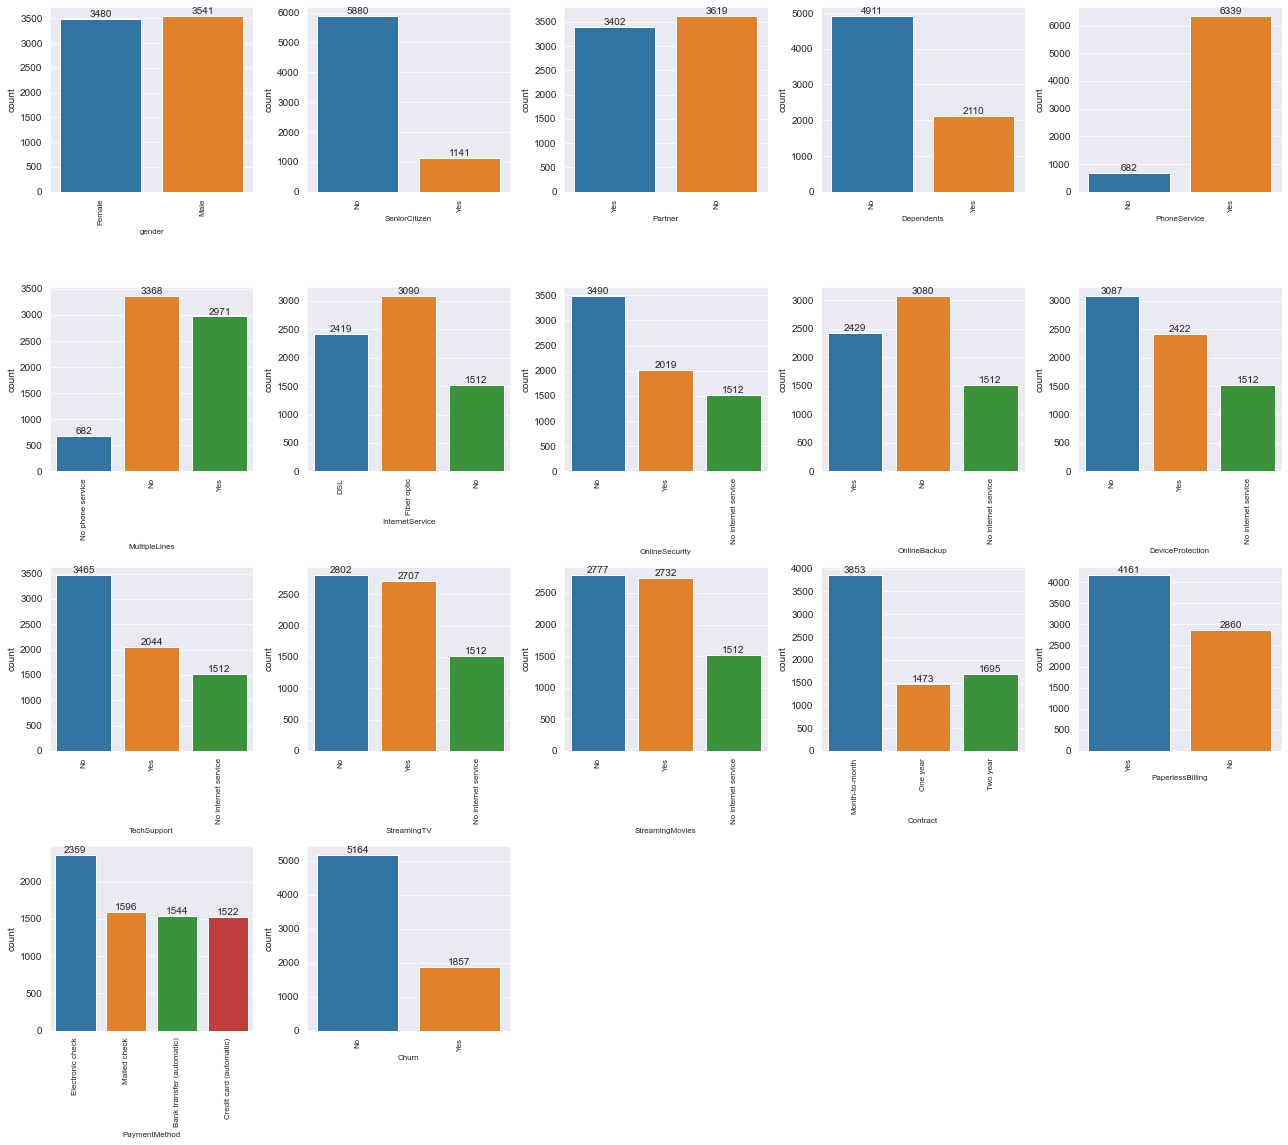

In [27]:
#distribution of numerical features using countplot
i=0
plt.figure(figsize=(18,16))
for column in data1_cat.columns:
    plt.subplot(4,5,i+1)
    ax = sns.countplot(x= data1_cat[column])
    ax.bar_label(ax.containers[0]);
    plt.xticks(fontsize = 8, rotation=90)
    plt.xlabel(column,fontsize=8)
    i+=1
    
plt.tight_layout()

Observation:

1. Male & Femal count is alomost equal.
2. 1141 customers are of senior citizen.
3. 3402 customers have parteners, 3619 have no partners.
4. 4911 customers have no dependants, 2110 have dependants
5. 90% of the customers have phone service enabled, 2971 customers have multiple lines.
6. 34% of the customers have internet service of DSL type, 44% employees have fibre optic amd remaining have no service.
7. 36% have online security, 44% have online backup, 56% have device protection, 37% with tech support, 49% with TV & Movie streaming functionality.
8. 55% customers have month to month contract, 21% have one year contract & 24% are on two year contract.
9. 59% of the customers are on paperless billing facility.
10.33.6% of the customers pay through electronic check, 22.7% pay through mailed check, 22% pay using bank transfer facility & remaining customers pay using credit card.

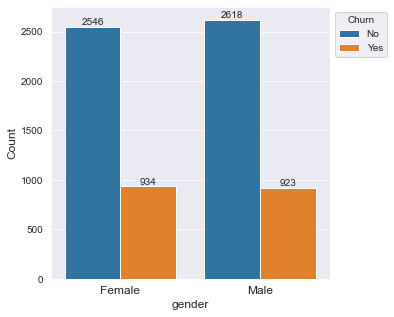

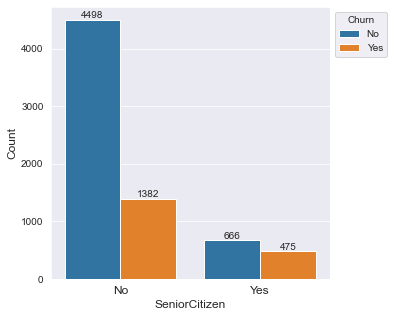

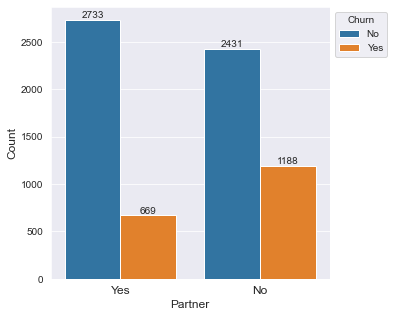

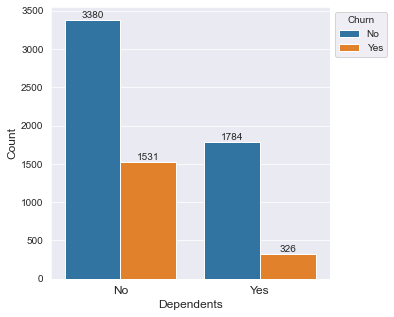

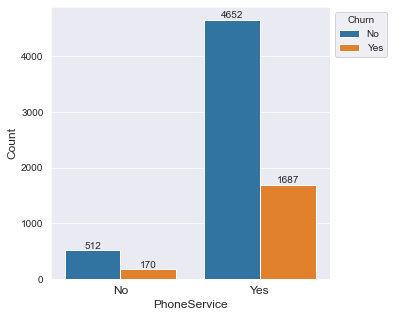

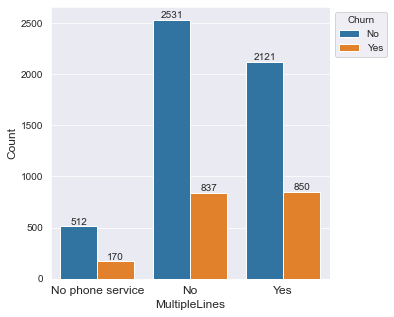

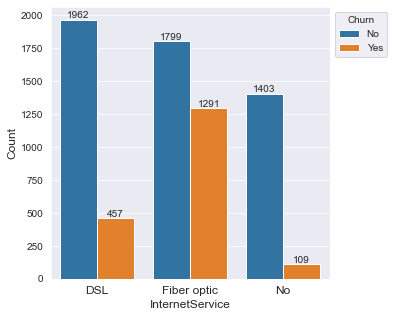

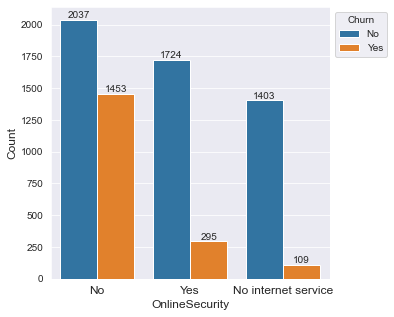

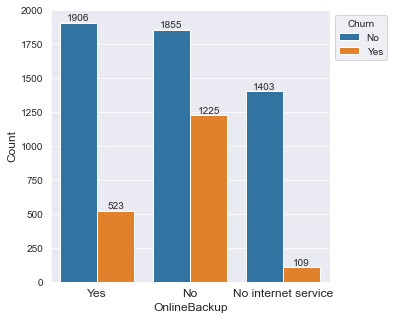

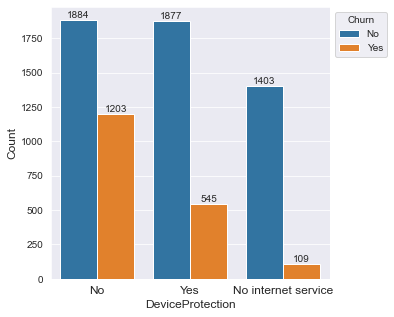

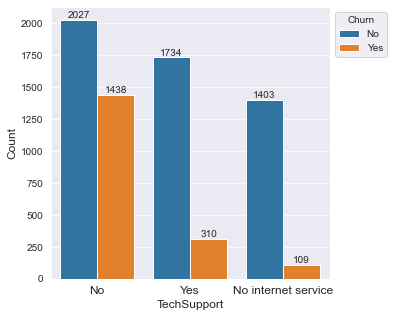

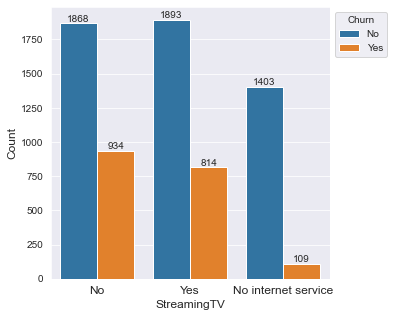

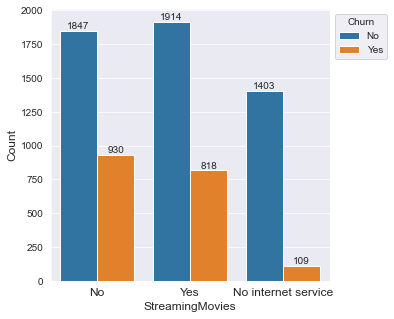

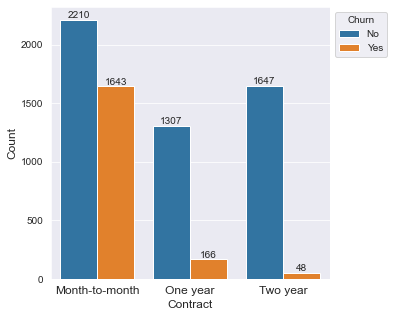

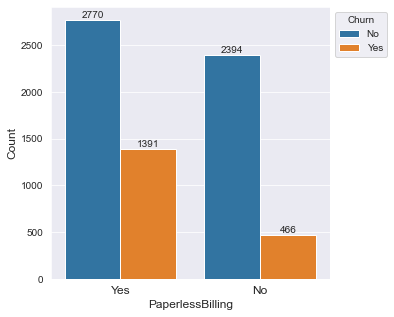

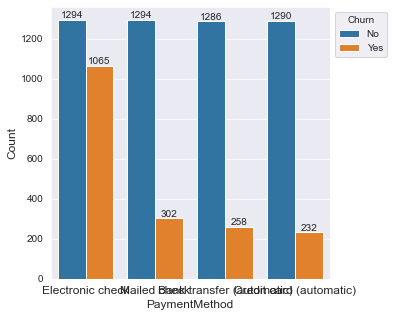

In [28]:
for item in data1_cat[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']].columns:
    plt.figure(figsize=(5,5))
    ax = sns.countplot(x=item,hue='Churn',data=data1_cat)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xticks(fontsize = 12, rotation=0)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)

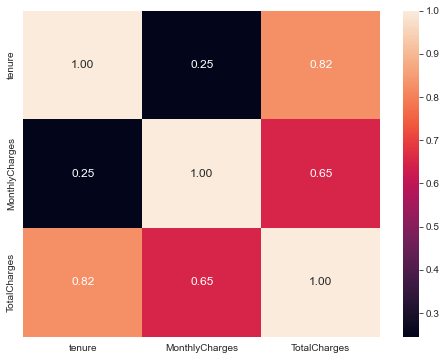

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(data1_num.corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

Observation:
1. MonthlyCharges & Tenure has no relationship.
2. TotalCharges & Tenure are linearly related.
3. TotalCharges & MonthlyCharges are also linearly related.

In [30]:
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [32]:
data2 = data1.copy()

In [33]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
gender_dict = {'Male':1, 'Female':0}
srct_part_dep_ps_bill_churn_dict = {'Yes' :1, 'No':0}
mlti_line_dict = {'Yes' :1, 'No':0.5, 'No phone service':0}
int_serv_dict = {'Yes' :1, 'No':0.5, 'No internet service':0}

data2['gender'] = data2['gender'].map(gender_dict)
data2['SeniorCitizen'] = data2['SeniorCitizen'].map(srct_part_dep_ps_bill_churn_dict)
data2['Partner'] = data2['Partner'].map(srct_part_dep_ps_bill_churn_dict)
data2['Dependents'] = data2['Dependents'].map(srct_part_dep_ps_bill_churn_dict)
data2['PhoneService'] = data2['PhoneService'].map(srct_part_dep_ps_bill_churn_dict)
data2['PaperlessBilling'] = data2['PaperlessBilling'].map(srct_part_dep_ps_bill_churn_dict)
data2['Churn'] = data2['Churn'].map(srct_part_dep_ps_bill_churn_dict)
data2['MultipleLines'] = data2['MultipleLines'].map(mlti_line_dict)
data2['OnlineSecurity'] = data2['OnlineSecurity'].map(int_serv_dict)
data2['OnlineBackup'] = data2['OnlineBackup'].map(int_serv_dict)
data2['DeviceProtection'] = data2['DeviceProtection'].map(int_serv_dict)
data2['TechSupport'] = data2['TechSupport'].map(int_serv_dict)
data2['StreamingTV'] = data2['StreamingTV'].map(int_serv_dict)
data2['StreamingMovies'] = data2['StreamingMovies'].map(int_serv_dict)

In [35]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0.0,DSL,0.5,1.0,0.5,0.5,0.5,0.5,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0.5,DSL,1.0,0.5,1.0,0.5,0.5,0.5,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0.5,DSL,1.0,1.0,0.5,0.5,0.5,0.5,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0.0,DSL,1.0,0.5,1.0,1.0,0.5,0.5,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0.5,Fiber optic,0.5,0.5,0.5,0.5,0.5,0.5,Month-to-month,1,Electronic check,70.70,151.65,1


In [36]:
data3 = pd.get_dummies(data2, drop_first = True)
data3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0.5,1.0,0.5,1.0,0.5,0.5,0.5,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0.5,1.0,1.0,0.5,0.5,0.5,0.5,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0.0,1.0,0.5,1.0,1.0,0.5,0.5,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1,0,1,1,24,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1,84.80,1990.50,0,0,0,1,0,0,0,1
7017,0,0,1,1,72,1,1.0,0.5,1.0,1.0,0.5,1.0,1.0,1,103.20,7362.90,0,1,0,1,0,1,0,0
7018,0,0,1,1,11,0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,1,29.60,346.45,0,0,0,0,0,0,1,0
7019,1,1,1,0,4,1,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1,74.40,306.60,1,1,0,0,0,0,0,1


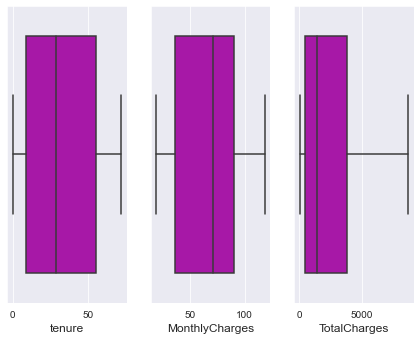

In [37]:
#Checking for outliers & removing..
plt.figure(figsize=(15,12))
plotnumber=1
for col in num_cols:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.boxplot(data2[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [38]:
data3[num_cols].skew()

tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959088
dtype: float64

In [39]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data3[num_cols])
x = pt.transform(data3[num_cols])
x = pd.DataFrame(x, columns=data3[num_cols].columns)
x.skew()

tenure           -0.243646
MonthlyCharges   -0.259855
TotalCharges     -0.143822
dtype: float64

Swewness removed from total charges column by using Power Trnsformer

In [40]:
data4 = data3.copy()
data4[num_cols] = x
data4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.813358,0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,1,25.143478,5.478919,0,0,0,0,0,0,1,0
1,1,0,0,0,8.779206,1,0.5,1.0,0.5,1.0,0.5,0.5,0.5,0,46.106682,22.915301,0,0,0,1,0,0,0,1
2,1,0,0,0,1.420869,1,0.5,1.0,1.0,0.5,0.5,0.5,0.5,1,43.750087,9.051328,1,0,0,0,0,0,0,1
3,1,0,0,0,10.218296,0,0.0,1.0,0.5,1.0,1.0,0.5,0.5,0,34.885005,22.737194,0,0,0,1,0,0,0,0
4,0,0,0,0,1.420869,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,56.462160,10.209309,1,1,0,0,0,0,1,0


In [41]:
rcols = data4.columns.to_list()
rcols.remove('Churn')
rcols.append('Churn')
data5 = data4[rcols]

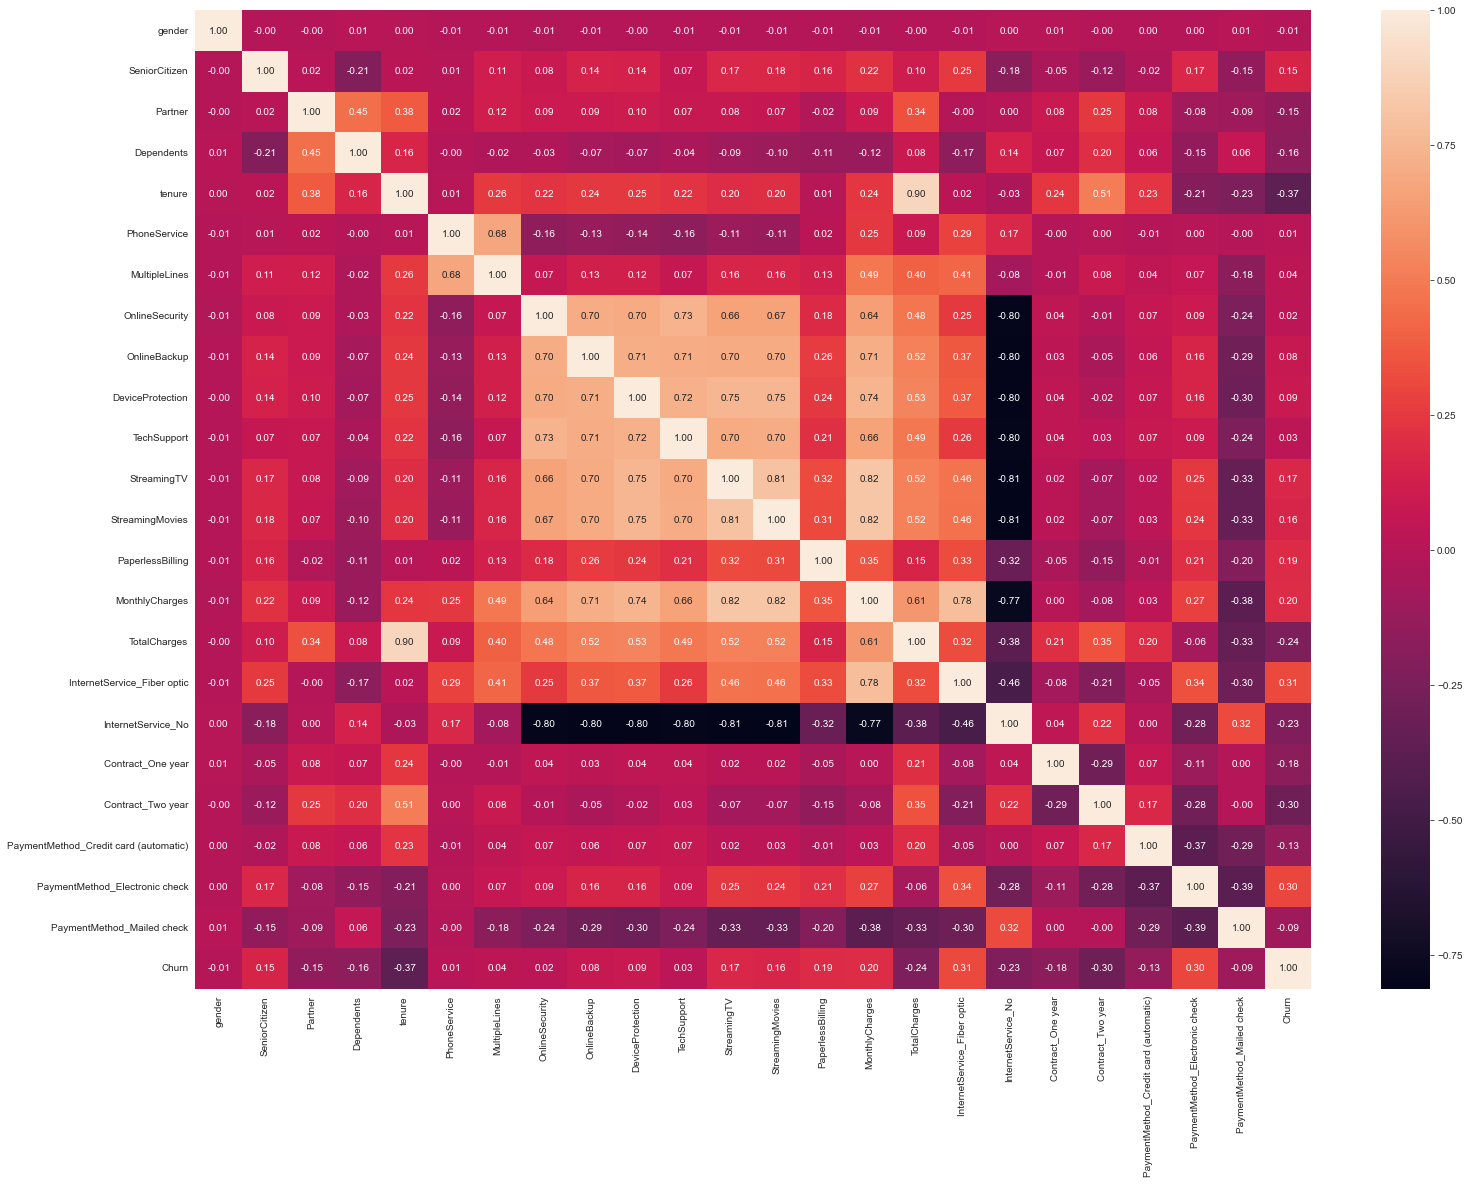

In [42]:
#Correlation & Multicollinearity
plt.figure(figsize=(25,18))
sns.heatmap(data5.corr(),annot=True, fmt = ".2f", annot_kws={'size':10});
plt.show()

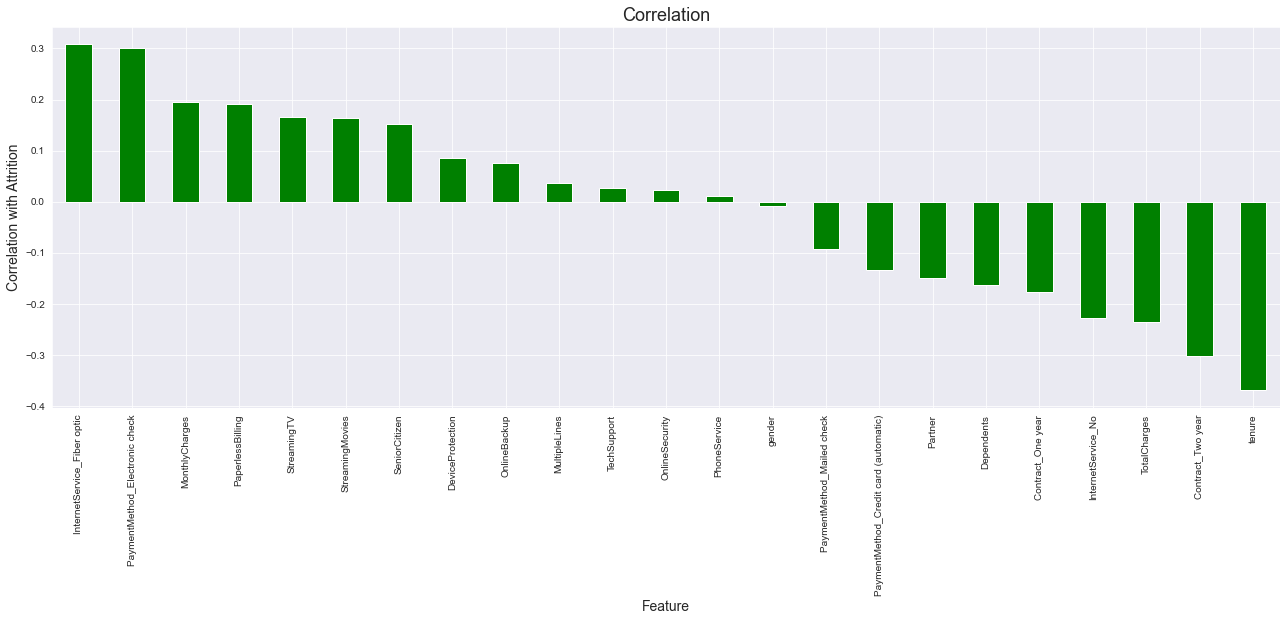

In [43]:
plt.figure(figsize = (22,7))
data5.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Correlation with Attrition', fontsize=14)
plt.title('Correlation', fontsize=18)
plt.show()

# Standard Scaler

In [44]:
scaler= StandardScaler()
df_feature = pd.DataFrame(scaler.fit_transform(data5.drop('Churn', axis=1)), columns = data5.drop('Churn', axis=1).columns)
df_target = data5['Churn']

In [45]:
x_check = df_feature[num_cols]
model = sm.OLS(df_target, sm.add_constant(x_check)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     759.0
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:03:24   Log-Likelihood:                -3228.6
No. Observations:                7021   AIC:                             6465.
Df Residuals:                    7017   BIC:                             6493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2645      0.005     57.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variables"] = x_check.columns
vif["VIF"] = [variance_inflation_factor(x_check.values, i) for i in range(x_check.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,Variables,VIF
2,TotalCharges,35.198948
0,tenure,23.275019
1,MonthlyCharges,7.346609


In [47]:
df_feat1 = x_check.drop(['TotalCharges'], axis=1)

vif = pd.DataFrame()
vif["variables"] = df_feat1.columns
vif["VIF"] = [variance_inflation_factor(df_feat1.values, i) for i in range(df_feat1.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,MonthlyCharges,1.061797
0,tenure,1.061797


In [48]:
df_feature.drop('TotalCharges', axis = 1, inplace =True)

In [49]:
df_target.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y_class = oversample.fit_resample(df_feature, df_target)

In [51]:
y_class.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

In [52]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, X, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,X, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

for Decision Tree Classifier model..
Best Random_state number for splitting the data is:  19
Accuracy score for Train : 99.82%
Accuracy score for Test : 80.48%
Confusion Matrix :

[[1084  260]
 [ 244  994]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1344
           1       0.79      0.80      0.80      1238

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

Cross Validation score at best cv=10 is : 79.34%


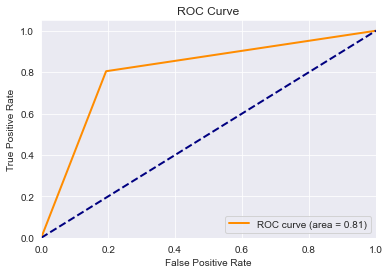

for Extra Trees Classifier model..
Best Random_state number for splitting the data is:  14
Accuracy score for Train : 99.82%
Accuracy score for Test : 86.56%
Confusion Matrix :

[[1084  197]
 [ 150 1151]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1281
           1       0.85      0.88      0.87      1301

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

Cross Validation score at best cv=5 is : 86.31%


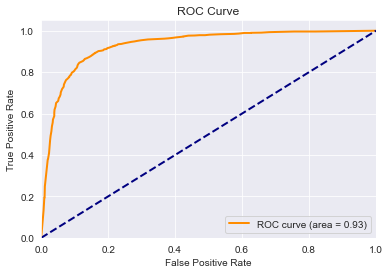

for Gaussian NB Classifier model..
Best Random_state number for splitting the data is:  73
Accuracy score for Train : 75.37%
Accuracy score for Test : 75.37%
Confusion Matrix :

[[ 818  478]
 [ 158 1128]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.84      0.63      0.72      1296
           1       0.70      0.88      0.78      1286

    accuracy                           0.75      2582
   macro avg       0.77      0.75      0.75      2582
weighted avg       0.77      0.75      0.75      2582

Cross Validation score at best cv=9 is : 75.38%


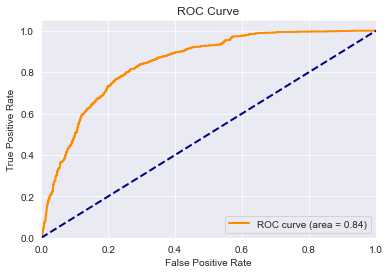

for KNeighbors Classifier model..
Best Random_state number for splitting the data is:  124
Accuracy score for Train : 84.53%
Accuracy score for Test : 80.13%
Confusion Matrix :

[[ 916  367]
 [ 146 1153]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1283
           1       0.76      0.89      0.82      1299

    accuracy                           0.80      2582
   macro avg       0.81      0.80      0.80      2582
weighted avg       0.81      0.80      0.80      2582

Cross Validation score at best cv=9 is : 79.57%


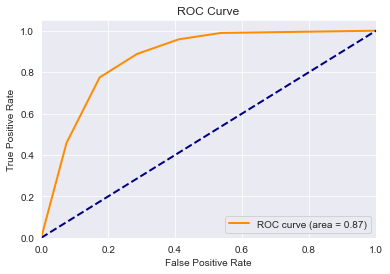

for Logistic Regression model..
Best Random_state number for splitting the data is:  4
Accuracy score for Train : 78.03%
Accuracy score for Test : 78.04%
Confusion Matrix :

[[ 955  341]
 [ 226 1060]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1296
           1       0.76      0.82      0.79      1286

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582

Cross Validation score at best cv=5 is : 78.04%


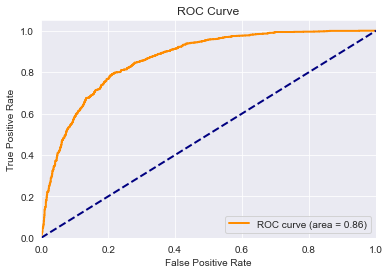

for Random Forest Classifier model..
Best Random_state number for splitting the data is:  75
Accuracy score for Train : 99.81%
Accuracy score for Test : 86.48%
Confusion Matrix :

[[1095  179]
 [ 170 1138]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1274
           1       0.86      0.87      0.87      1308

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

Cross Validation score at best cv=10 is : 85.82%


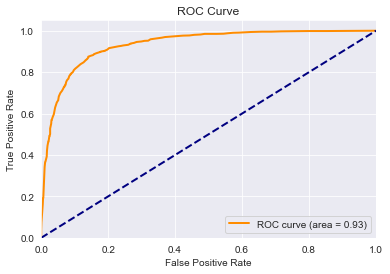

for Gradient Boosting Classifier model..
Best Random_state number for splitting the data is:  48
Accuracy score for Train : 85.31%
Accuracy score for Test : 85.32%
Confusion Matrix :

[[1070  229]
 [ 150 1133]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1299
           1       0.83      0.88      0.86      1283

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582

Cross Validation score at best cv=11 is : 84.25%


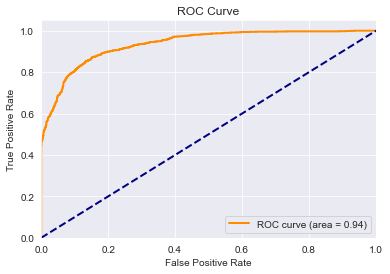

for Bagging Classifier model..
Best Random_state number for splitting the data is:  68
Accuracy score for Train : 98.93%
Accuracy score for Test : 82.77%
Confusion Matrix :

[[1073  188]
 [ 257 1064]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1261
           1       0.85      0.81      0.83      1321

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582

Cross Validation score at best cv=5 is : 82.80%


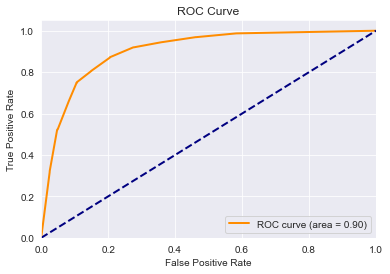

for Support vector Classifier model..
Best Random_state number for splitting the data is:  147
Accuracy score for Train : 82.26%
Accuracy score for Test : 81.84%
Confusion Matrix :

[[ 976  296]
 [ 173 1137]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1272
           1       0.79      0.87      0.83      1310

    accuracy                           0.82      2582
   macro avg       0.82      0.82      0.82      2582
weighted avg       0.82      0.82      0.82      2582

Cross Validation score at best cv=10 is : 80.74%


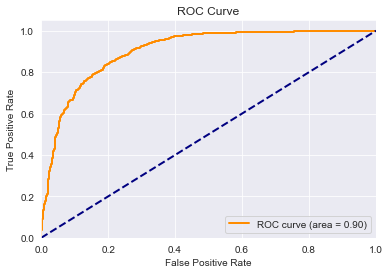

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
4,Logistic Regression,4,78.03,78.04,0.00,5,78.040480
2,Gaussian NB Classifier,73,75.37,75.37,0.01,9,75.377704
7,Bagging Classifier,68,98.93,82.77,0.02,5,82.795445
1,Extra Trees Classifier,14,99.82,86.56,0.08,5,86.309932
3,KNeighbors Classifier,124,84.53,80.13,0.56,9,79.570542
5,Random Forest Classifier,75,99.81,86.48,0.56,10,85.816364
0,Decision Tree Classifier,19,99.82,80.48,0.98,10,79.338599
6,Gradient Boosting Classifier,48,85.31,85.32,1.07,11,84.247160
8,Support vector Classifier,147,82.26,81.84,1.10,10,80.742128


In [53]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier()
lgr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
svc = SVC(probability=True)
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,gnb,knc,lgr,rfc,gbc,bgc,svc]
models_name = ['Decision Tree Classifier','Extra Trees Classifier','Gaussian NB Classifier','KNeighbors Classifier','Logistic Regression',
               'Random Forest Classifier','Gradient Boosting Classifier', 'Bagging Classifier', 'Support vector Classifier']
dummy_count = 0 
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    
    print('for '+ models_name[dummy_count] + ' model..')
    
    print("Best Random_state number for splitting the data is: ", best_i)
    
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
    dummy_count+=1

    

table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])



table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

# Hyper paramter tuning

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = 2)

In [55]:
param_grid_etc = {'n_estimators':[400,500,600,800,900],
                  'criterion':["gini", "entropy"],
                  'max_depth':[4,5,6,7,8],
                  'min_samples_split':[3,4,5,6],
                  'min_samples_leaf':[1, 2, 3]
                 }

In [56]:
etc_grid = GridSearchCV(estimator = etc,
                       param_grid = param_grid_etc,
                       verbose = 1,
                        cv = 9,
                       scoring = 'accuracy')

In [61]:
etc_final = ExtraTreesClassifier(criterion='gini',
                                 max_depth=8,
                                 min_samples_leaf=1,
                                 min_samples_split=4,
                                 n_estimators= 400)

In [62]:
etc_final.fit(x_train,y_train)
y_pred=etc_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8140975987606507


Confusion Matrix :

[[1007  292]
 [ 188 1095]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1299
           1       0.79      0.85      0.82      1283

    accuracy                           0.81      2582
   macro avg       0.82      0.81      0.81      2582
weighted avg       0.82      0.81      0.81      2582

Cross Validation score at best cv = 9 is : 80.17%


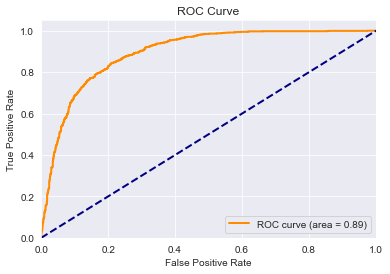

In [64]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(etc_final,X, y_class, cv=9, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 9 is : {cv_score*100:.2f}%")
y_predict_probabilities = etc_final.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

In [65]:
#Model Saving
filename='CustomerChurn.pkl'
pickle.dump(etc,open(filename,'wb'))

In [66]:
model =pickle.load(open('CustomerChurn.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
2577,1,1
2578,0,0
2579,0,0
2580,0,0
